In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [125]:
data_src = "solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src)

In [126]:
num_lags = 30
for i in range(1, num_lags + 1):
    data_df[f'GHI_T_{i}'] = data_df['GHI'].shift(i)

In [127]:
data_df

,datetime,local_datetime,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,...,GHI_T_21,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30
0,2018-01-01 16:30:00,2018-01-01 09:30:00,2018,1,1,16,30,-1.2,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 16:40:00,2018-01-01 09:40:00,2018,1,1,16,40,-0.8,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 16:50:00,2018-01-01 09:50:00,2018,1,1,16,50,-0.3,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 17:00:00,2018-01-01 10:00:00,2018,1,1,17,0,0.1,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 17:10:00,2018-01-01 10:10:00,2018,1,1,17,10,0.5,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,2023-12-31 22:00:00,2023-12-31 15:00:00,2023,12,31,22,0,3.1,1.15,0.029,...,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0
135552,2023-12-31 22:10:00,2023-12-31 15:10:00,2023,12,31,22,10,2.8,1.15,0.029,...,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0
135553,2023-12-31 22:20:00,2023-12-31 15:20:00,2023,12,31,22,20,2.5,1.15,0.029,...,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0
135554,2023-12-31 22:30:00,2023-12-31 15:30:00,2023,12,31,22,30,2.2,1.15,0.029,...,377.0,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0


In [128]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-4)
data.dropna(inplace = True)

In [129]:
data

,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,Asymmetry,Clearsky DHI,...,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30,Target
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,2018,1,1,21,30,2.4,1.18,0.021,0.62,46,...,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,142.0,57.0
2018-01-01 14:40:00,2018,1,1,21,40,2.0,1.17,0.022,0.62,45,...,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,83.0
2018-01-01 14:50:00,2018,1,1,21,50,1.6,1.17,0.022,0.62,44,...,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,110.0
2018-01-02 07:40:00,2018,1,2,14,40,-7.3,1.17,0.016,0.62,15,...,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,138.0
2018-01-02 07:50:00,2018,1,2,14,50,-6.7,1.17,0.016,0.62,20,...,378.0,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:20:00,2023,12,31,21,20,4.3,1.16,0.029,0.62,50,...,306.0,296.0,280.0,263.0,244.0,246.0,236.0,221.0,198.0,203.0
2023-12-31 14:30:00,2023,12,31,21,30,4.0,1.16,0.029,0.62,49,...,322.0,306.0,296.0,280.0,263.0,244.0,246.0,236.0,221.0,183.0
2023-12-31 14:40:00,2023,12,31,21,40,3.7,1.15,0.029,0.62,47,...,268.0,322.0,306.0,296.0,280.0,263.0,244.0,246.0,236.0,153.0


In [130]:
corr_matrix = data.corr()
target_corr = corr_matrix['Target'].sort_values(ascending = False)
print(target_corr)

Target                1.000000
GHI                   0.864578
GHI_T_1               0.825928
GHI_T_2               0.783945
GHI_T_3               0.738897
Clearsky GHI          0.705732
GHI_T_4               0.691128
GHI_T_5               0.640640
GHI_T_6               0.588125
DNI                   0.569822
Clearsky DNI          0.551311
GHI_T_7               0.534116
GHI_T_8               0.479090
Kcs                   0.430000
GHI_T_9               0.422040
Temperature           0.391550
GHI_T_10              0.364720
Clearsky DHI          0.330028
GHI_T_11              0.306821
GHI_T_12              0.249471
GHI_T_13              0.192305
Hour                  0.155629
Pressure              0.146389
DHI                   0.143132
GHI_T_14              0.136049
GHI_T_15              0.081367
Alpha                 0.062896
Wind Speed            0.051190
Dew Point             0.043776
Precipitable Water    0.034753
GHI_T_16              0.028353
Minute                0.002552
Day     

In [131]:
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
print(selected_features)

['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'Clearsky GHI', 'GHI_T_4', 'GHI_T_5', 'GHI_T_6', 'DNI', 'Clearsky DNI', 'GHI_T_7', 'GHI_T_8', 'Kcs', 'GHI_T_9', 'Temperature', 'GHI_T_10', 'Clearsky DHI', 'GHI_T_11', 'GHI_T_25', 'GHI_T_26', 'GHI_T_27', 'GHI_T_28', 'GHI_T_29', 'GHI_T_30', 'Relative Humidity', 'Solar Zenith Angle']


In [132]:
data = data[selected_features]
print(data.columns)

Index(['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'Clearsky GHI',
       'GHI_T_4', 'GHI_T_5', 'GHI_T_6', 'DNI', 'Clearsky DNI', 'GHI_T_7',
       'GHI_T_8', 'Kcs', 'GHI_T_9', 'Temperature', 'GHI_T_10', 'Clearsky DHI',
       'GHI_T_11', 'GHI_T_25', 'GHI_T_26', 'GHI_T_27', 'GHI_T_28', 'GHI_T_29',
       'GHI_T_30', 'Relative Humidity', 'Solar Zenith Angle'],
      dtype='object')


In [133]:
data

,Target,GHI,GHI_T_1,GHI_T_2,GHI_T_3,Clearsky GHI,GHI_T_4,GHI_T_5,GHI_T_6,DNI,...,Clearsky DHI,GHI_T_11,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30,Relative Humidity,Solar Zenith Angle
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,57.0,152,179.0,192.0,292.0,328,327.0,342.0,359.0,29,...,46,493.0,253.0,241.0,226.0,204.0,189.0,142.0,34.01,71.33
2018-01-01 14:40:00,83.0,160,152.0,179.0,192.0,305,292.0,327.0,342.0,43,...,45,486.0,251.0,253.0,241.0,226.0,204.0,189.0,41.97,72.47
2018-01-01 14:50:00,110.0,145,160.0,152.0,179.0,282,192.0,292.0,327.0,36,...,44,477.0,273.0,251.0,253.0,241.0,226.0,204.0,43.18,73.66
2018-01-02 07:40:00,138.0,34,145.0,160.0,152.0,34,179.0,192.0,292.0,438,...,15,463.0,283.0,273.0,251.0,253.0,241.0,226.0,61.51,87.51
2018-01-02 07:50:00,166.0,57,34.0,145.0,160.0,57,152.0,179.0,192.0,536,...,20,451.0,323.0,283.0,273.0,251.0,253.0,241.0,58.74,85.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:20:00,203.0,271,241.0,283.0,317.0,341,341.0,346.0,346.0,385,...,50,386.0,263.0,244.0,246.0,236.0,221.0,198.0,46.80,70.43
2023-12-31 14:30:00,183.0,251,271.0,241.0,283.0,320,317.0,341.0,346.0,380,...,49,404.0,280.0,263.0,244.0,246.0,236.0,221.0,47.79,71.52
2023-12-31 14:40:00,153.0,246,251.0,271.0,241.0,295,283.0,317.0,341.0,448,...,47,401.0,296.0,280.0,263.0,244.0,246.0,236.0,55.02,72.66


In [134]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1).to_numpy()

In [135]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108417, 26) (108417, 1) (27105, 26) (27105, 1)


In [136]:
properties = None

In [137]:
from sklearn.linear_model import LinearRegression

benchmark_model = LinearRegression()

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.1087 seconds
Score on Training data : 80.1293%
Score on Testing data : 81.3492%
RMSE : 115.8877
nRMSE: 0.2810
MAE: 80.5052


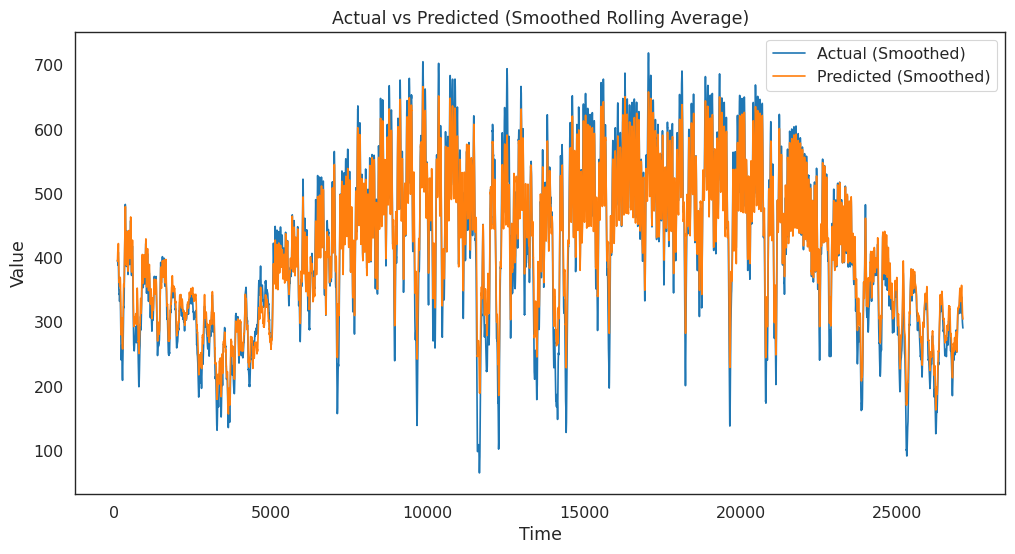

In [138]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [139]:
from sklearn.linear_model import Ridge

benchmark_model = Ridge(alpha = 0.8)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Ridge Regression",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.0345 seconds
Score on Training data : 80.1293%
Score on Testing data : 81.3487%
RMSE : 115.8893
nRMSE: 0.2810
MAE: 80.5125


In [140]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),115.8877,0.281,80.5052,80.1293,81.3492,0.1087
Ridge Regression,115.8893,0.281,80.5125,80.1293,81.3487,0.0345


In [141]:
from sklearn.neighbors import KNeighborsRegressor

benchmark_model = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean", weights = "uniform")
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "KNeighbours Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

KNeighborsRegressor(metric='euclidean')
Regressor fitted in 0.0116 seconds
Score on Training data : 90.3873%
Score on Testing data : 81.4925%
RMSE : 115.4418
nRMSE: 0.2799
MAE: 70.5568


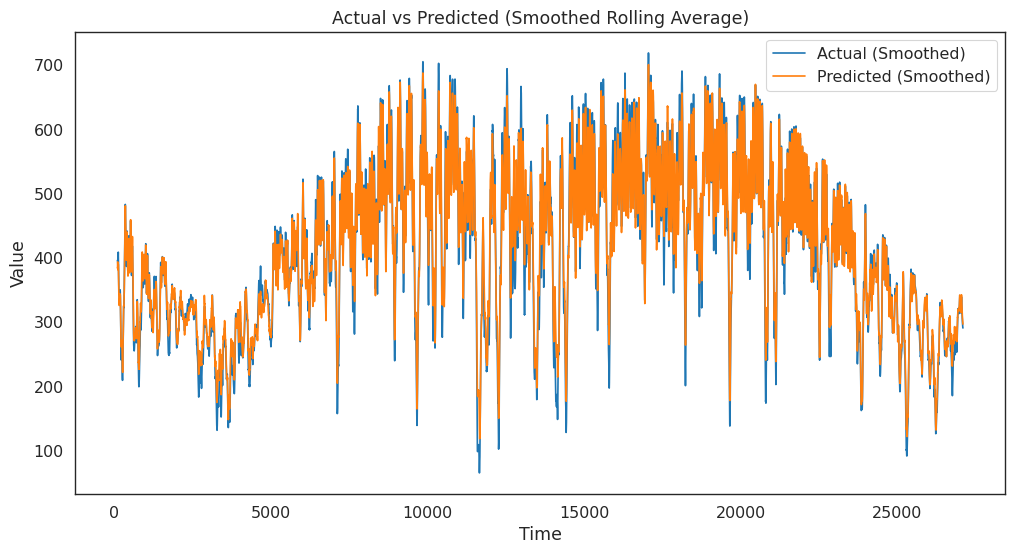

In [142]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [143]:
from sklearn.ensemble import RandomForestRegressor

benchmark_model = RandomForestRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "RandomForest Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=125)
Regressor fitted in 421.82 seconds
Score on Training data : 95.52%
Score on Testing data : 85.59%
Regressor fitted in 421.8168 seconds
Score on Training data : 95.5166%
Score on Testing data : 85.5906%
RMSE : 101.8618
nRMSE: 0.2469
MAE: 60.5473


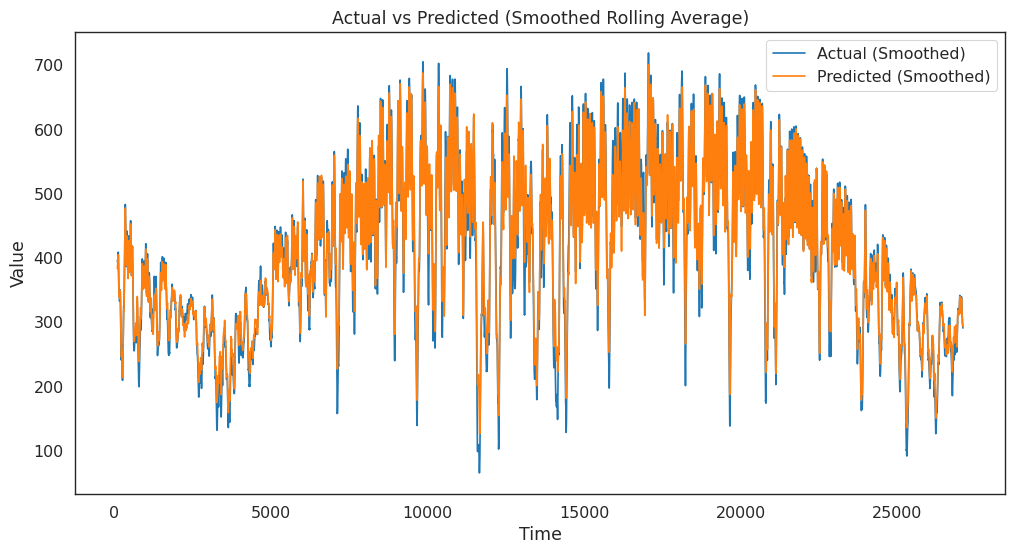

In [144]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

benchmark_model = GradientBoostingRegressor(n_estimators = 125, max_depth = 5, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "GradientBoosting Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                          n_estimators=125)
Regressor fitted in 157.64 seconds
Score on Training data : 86.85%
Score on Testing data : 85.19%
Regressor fitted in 157.6407 seconds
Score on Training data : 86.8477%
Score on Testing data : 85.1895%
RMSE : 103.2699
nRMSE: 0.2504
MAE: 63.7315


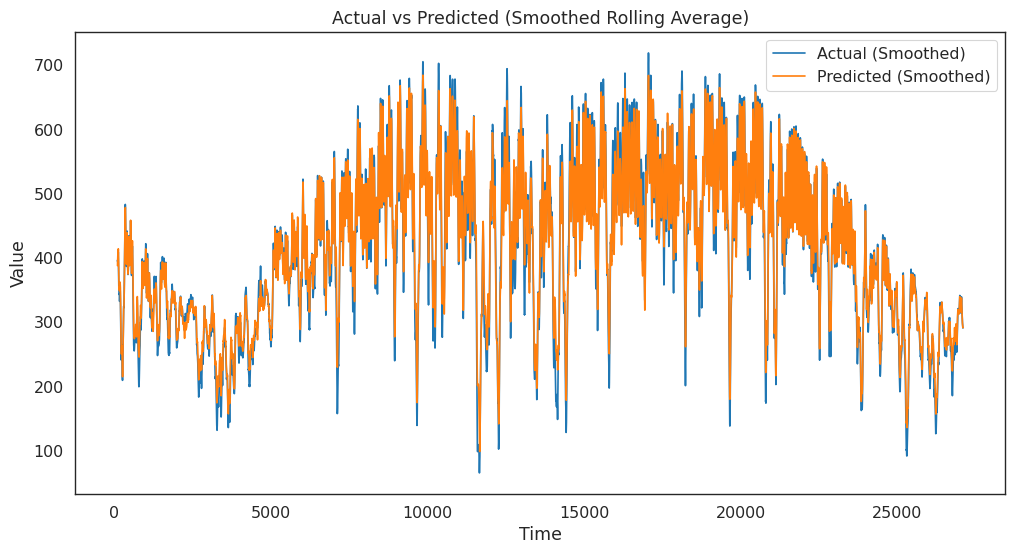

In [146]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [147]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 74.83 seconds
Score on Training data : 96.21%
Score on Testing data : 85.76%
Regressor fitted in 74.8324 seconds
Score on Training data : 96.2146%
Score on Testing data : 85.7611%
RMSE : 101.2577
nRMSE: 0.2455
MAE: 60.0535


In [148]:
from sklearn.neural_network import MLPRegressor

benchmark_model = MLPRegressor(batch_size = 256, solver = "adam", activation = "relu", max_iter = 300, learning_rate_init = 0.005)
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "MLP Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

MLPRegressor(batch_size=256, learning_rate_init=0.005, max_iter=300)
Regressor fitted in 15.06 seconds
Score on Training data : 84.82%
Score on Testing data : 84.70%
Regressor fitted in 15.0636 seconds
Score on Training data : 84.8245%
Score on Testing data : 84.7006%
RMSE : 104.9607
nRMSE: 0.2545
MAE: 63.9334


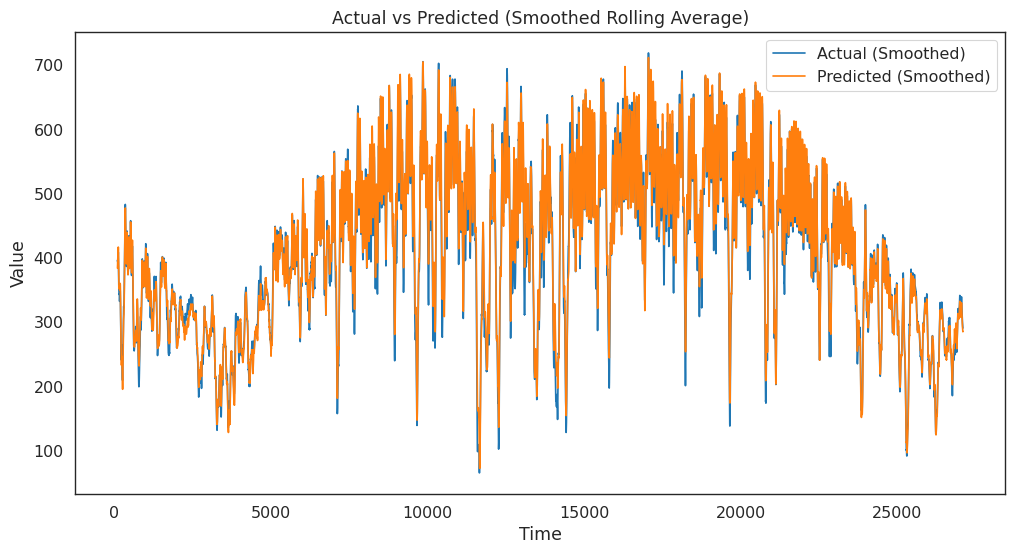

In [149]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [150]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),115.8877,0.281,80.5052,80.1293,81.3492,0.1087
Ridge Regression,115.8893,0.281,80.5125,80.1293,81.3487,0.0345
KNeighbours Regressor,115.4418,0.2799,70.5568,90.3873,81.4925,0.0116
RandomForest Regressor,101.8618,0.2469,60.5473,95.5166,85.5906,421.8168
GradientBoosting Regressor,103.2699,0.2504,63.7315,86.8477,85.1895,157.6407
ExtraTrees Regressor,101.2577,0.2455,60.0535,96.2146,85.7611,74.8324
MLP Regressor,104.9607,0.2545,63.9334,84.8245,84.7006,15.0636


In [151]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor,101.2577,0.2455,60.0535,96.2146,85.7611,74.8324
RandomForest Regressor,101.8618,0.2469,60.5473,95.5166,85.5906,421.8168
GradientBoosting Regressor,103.2699,0.2504,63.7315,86.8477,85.1895,157.6407
MLP Regressor,104.9607,0.2545,63.9334,84.8245,84.7006,15.0636
KNeighbours Regressor,115.4418,0.2799,70.5568,90.3873,81.4925,0.0116
Linear Regression (Benchmark),115.8877,0.281,80.5052,80.1293,81.3492,0.1087
Ridge Regression,115.8893,0.281,80.5125,80.1293,81.3487,0.0345


# Performance Of Models

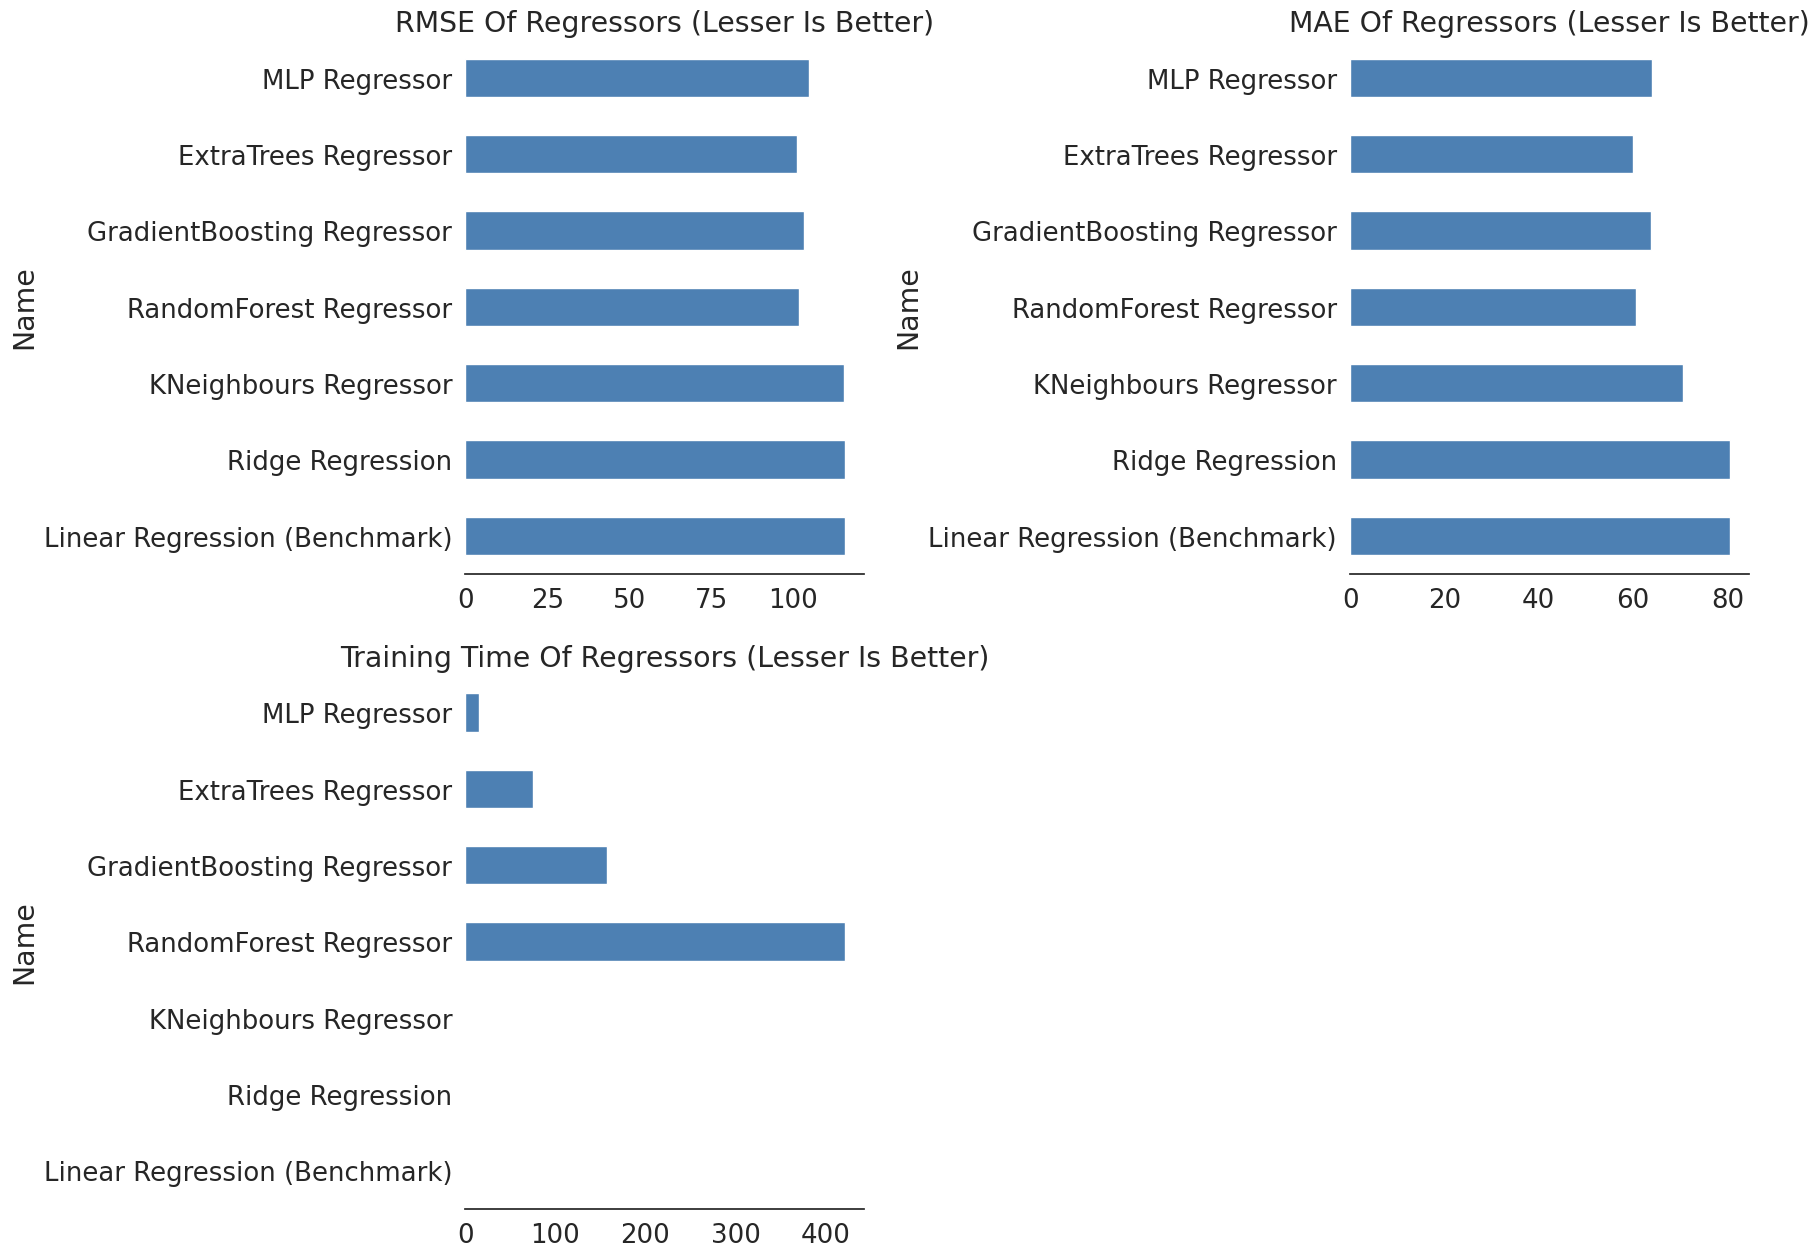

In [152]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.title("RMSE Of Regressors (Lesser Is Better)")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.title("MAE Of Regressors (Lesser Is Better)")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Training Time Of Regressors (Lesser Is Better)")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

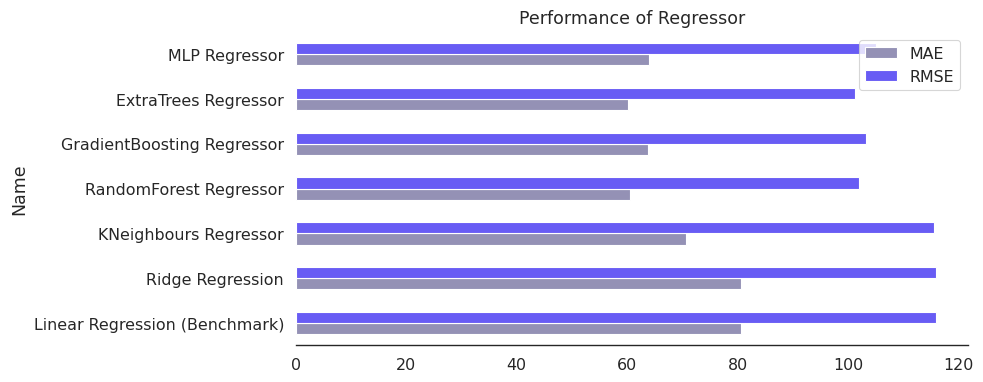

In [153]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout()

plt.show()

#Optimizing Best Peforming Model

In [154]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-4)
data.dropna(inplace = True)

In [155]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1)
featuresTrain = X.columns
X = X.to_numpy()

In [156]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108417, 56) (108417, 1) (27105, 56) (27105, 1)


In [157]:
from sklearn.ensemble import ExtraTreesRegressor

# Train model
etr = ExtraTreesRegressor()
Y_train_scaled = Y_train_scaled.ravel()
etr.fit(X_train_scaled, Y_train_scaled)

# Get feature importance
importances = etr.feature_importances_

# Sort and plot
feat_imp = pd.Series(importances, index=featuresTrain).sort_values(ascending=False)
top_features = feat_imp[feat_imp > 0.01].index
print(top_features)

Index(['GHI', 'GHI_T_1', 'GHI_T_2', 'Clearsky GHI', 'Hour', 'GHI_T_3',
       'GHI_T_4', 'Solar Zenith Angle', 'Kcs', 'DNI'],
      dtype='object')


In [158]:
X = data[list(top_features)].to_numpy()
X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108417, 10) (108417, 1) (27105, 10) (27105, 1)


In [159]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor (With Feature Selection)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 28.7981 seconds
Score on Training data : 93.8425%
Score on Testing data : 86.1875%
RMSE : 99.7300
nRMSE: 0.2418
MAE: 57.9313


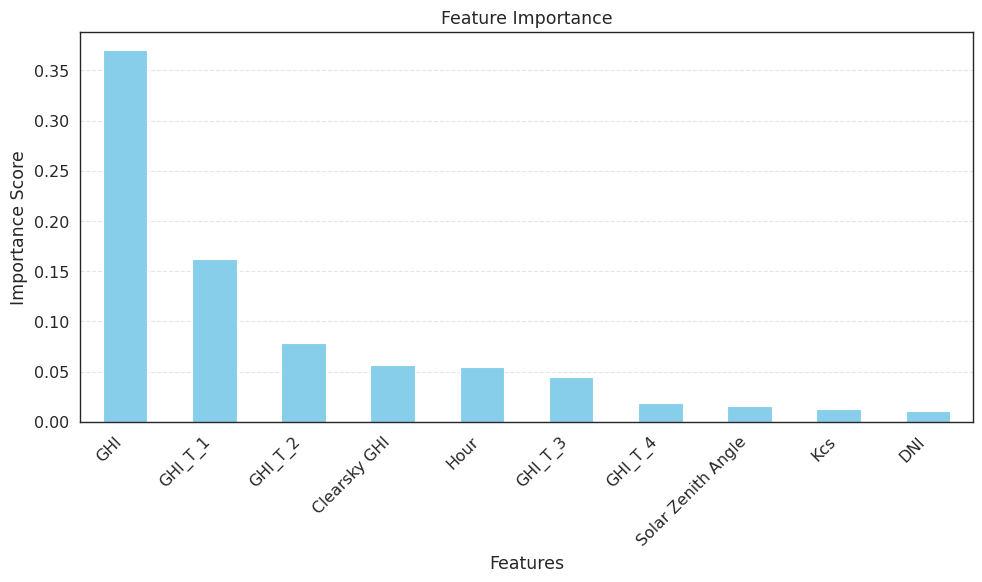

In [160]:
plt.figure(figsize=(10, 6))
feat_imp = feat_imp[feat_imp > 0.01]
feat_imp.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [161]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor (With Feature Selection),99.73,0.2418,57.9313,93.8425,86.1875,28.7981
ExtraTrees Regressor,101.2577,0.2455,60.0535,96.2146,85.7611,74.8324
RandomForest Regressor,101.8618,0.2469,60.5473,95.5166,85.5906,421.8168
GradientBoosting Regressor,103.2699,0.2504,63.7315,86.8477,85.1895,157.6407
MLP Regressor,104.9607,0.2545,63.9334,84.8245,84.7006,15.0636
KNeighbours Regressor,115.4418,0.2799,70.5568,90.3873,81.4925,0.0116
Linear Regression (Benchmark),115.8877,0.281,80.5052,80.1293,81.3492,0.1087
Ridge Regression,115.8893,0.281,80.5125,80.1293,81.3487,0.0345


In [162]:
properties.to_csv("40_Minutes_Ahead.csv", index = False)